In [1]:
import numpy as np
import os

In [12]:
np.random.seed(42)

In [15]:
import matplotlib
import matplotlib.pyplot as plt

In [17]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [18]:
# 그림을 저장할 폴더
PROJECT_ROOT_DIR = 'data/img'

In [19]:
def image_path(fig_id) :
    return os.path.join(PROJECT_ROOT_DIR, fig_id)

In [20]:
def save_fig(fig_id, tight_layout = True) :
    if tight_layout : 
        plt.tight_layout()
    plt.savefig(img_path(fig_id) + '.png', format='png', dpi = 300)

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [26]:
iris = load_iris()

In [31]:
X = iris.data[:, 2:] 
y = iris.target

In [53]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [54]:
from sklearn.tree import export_graphviz

In [55]:
export_graphviz(tree_clf, 
               out_file = image_path('iris_tree.dot'),
               feature_names = ['꽃잎 길이(cm)', '꽃잎 너비(cm)'], 
               class_names = iris.target_names, 
               rounded = True, 
               filled = True)

In [56]:
import graphviz

In [57]:
with open('data/img/iris_tree.dot') as f : 
    dot_graph = f.read()

In [58]:
dot = graphviz.Source(dot_graph)
dot.format= 'png'
dot.render(filename='iris_tree', directory = 'data/img', cleanup=True)

'data/img/iris_tree.png'

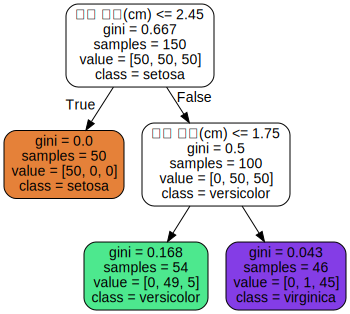

In [59]:
dot

In [61]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [62]:
tree_clf.predict([[5, 1.5]])

array([1])

In [71]:
from sklearn.datasets import make_moons
import sklearn.linear_model

In [64]:
Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 53)

In [66]:
deep_tree_clf1 = DecisionTreeClassifier(random_state = 42)
deep_tree_clf2 = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 4)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

NameError: name 'plot_decision_boundary' is not defined

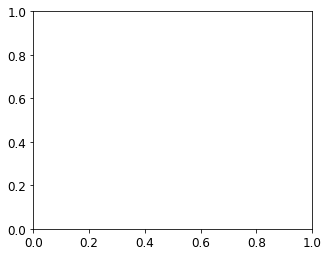

In [72]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, 
                      Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title('규제 없음', fontsize = 16)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, 
                      Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title('min_samples_leaf={}'.format(deep_tree_clf2.min_samples_leaf, fontsize= 14))

plt.show()